In [1]:
#Importem pandas i numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_name= 'thyroidDF'
df = pd.read_csv(f'data/{dataset_name}.csv')

In [3]:
print(df.dtypes)
df.head()

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
dtype: object


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
boolean_columns = df.columns[df.isin(['t', 'f']).all()]
df[boolean_columns] = df[boolean_columns].applymap(lambda x: 1 if x == 't' else 0)

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,0,0,0,0,0,0,0,1,...,NaN,0,NaN,0,NaN,0,NaN,other,-,840801013
1,29,F,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,0,NaN,other,-,840801014
2,41,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,11.0,other,-,840801042
3,36,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,26.0,other,-,840803046
4,32,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,36.0,other,S,840803047


In [5]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [6]:
hyperthyroid = {'A', 'B', 'C', 'D'}
hypothyroid = {'E', 'F', 'G', 'H'}

def classify_diagnosis(diagnosis):
    
    letters = set(diagnosis.replace('|', ''))
    if letters & hyperthyroid:
        return 2
    
    if letters & hypothyroid:
        return 0
    
    return 1

df['target'] = df['target'].apply(classify_diagnosis)
df['target'].unique()

array([1, 0, 2], dtype=int64)

In [7]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

sex    0.033471
TSH    0.091801
T3     0.283908
TT4    0.048190
T4U    0.088203
FTI    0.087440
TBG    0.961949
dtype: float64

In [8]:
df['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [9]:
dummies_referral_source = pd.get_dummies(df['referral_source'], dtype='int',drop_first=False)
df = pd.concat([df, dummies_referral_source], axis=1)
df = df.drop(['referral_source','other'], axis="columns")

In [10]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI,TBG_measured,TBG,target,patient_id,STMW,SVHC,SVHD,SVI,WEST
0,29,F,0,0,0,0,0,0,0,1,...,NaN,0,NaN,1,840801013,0,0,0,0,0
1,29,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,1,840801014,0,0,0,0,0
2,41,F,0,0,0,0,0,0,0,0,...,NaN,1,11.0,1,840801042,0,0,0,0,0
3,36,F,0,0,0,0,0,0,0,0,...,NaN,1,26.0,1,840803046,0,0,0,0,0
4,32,F,0,0,0,0,0,0,0,0,...,NaN,1,36.0,1,840803047,0,0,0,0,0


In [11]:
df['age'].nsmallest(5)

456     1
1142    1
1267    1
1921    1
3300    1
Name: age, dtype: int64

In [12]:
df['age'].nlargest(5)

8105    65526
6392    65512
5710    65511
2976      455
790        97
Name: age, dtype: int64

In [13]:
df = df[df['age'] < 100]

In [14]:
# Omplir NaNs de 'sexe' amb 'F' si 'pregnant' és 1
df.loc[(df['sex'].isna()) & (df['pregnant'] == 1), 'sex'] = 'F'

In [15]:
dummies_sex = pd.get_dummies(df['sex'], dtype='int',drop_first=True)
df = pd.concat([df, dummies_sex], axis=1)
df = df.drop(['sex'], axis="columns")
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TBG_measured,TBG,target,patient_id,STMW,SVHC,SVHD,SVI,WEST,M
0,29,0,0,0,0,0,0,0,1,0,...,0,NaN,1,840801013,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,0,NaN,1,840801014,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,1,11.0,1,840801042,0,0,0,0,0,0
3,36,0,0,0,0,0,0,0,0,0,...,1,26.0,1,840803046,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,1,36.0,1,840803047,0,0,0,0,0,0


In [16]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

TSH    0.091841
T3     0.283922
TT4    0.048211
T4U    0.088242
FTI    0.087478
TBG    0.961933
dtype: float64

In [17]:
mesures = ['TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
valors = ['TSH', 'T3','TT4','T4U','FTI', 'TBG']
for i in range(len(mesures)):
    no_mesured = df[df[mesures[i]] == 0]
    is_theory_correct = no_mesured[valors[i]].isna().all()
    print(is_theory_correct)


True
True
True
True
True
True


In [18]:
df.drop(['patient_id','TBG']+mesures,axis='columns', inplace=True)
for i in range(len(valors[:-1])):
    print(df[valors[i]].min(), df[valors[i]].max())

0.005 530.0
0.05 18.0
2.0 600.0
0.17 2.33
1.4 881.0


In [19]:
df_fill_na = df
df_fill_na[valors[:-1]] = df_fill_na[valors[:-1]].fillna(-1)
df_fill_na.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TT4,T4U,FTI,target,STMW,SVHC,SVHD,SVI,WEST,M
0,29,0,0,0,0,0,0,0,1,0,...,-1.0,-1.0,-1.0,1,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,128.0,-1.0,-1.0,1,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,-1.0,-1.0,-1.0,1,0,0,0,0,0,0
3,36,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,1,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,1,0,0,0,0,0,0


In [20]:
df_fill_na.dropna(inplace=True)

In [21]:
print(df_fill_na['target'].value_counts())

target
1    8260
0     667
2     241
Name: count, dtype: int64


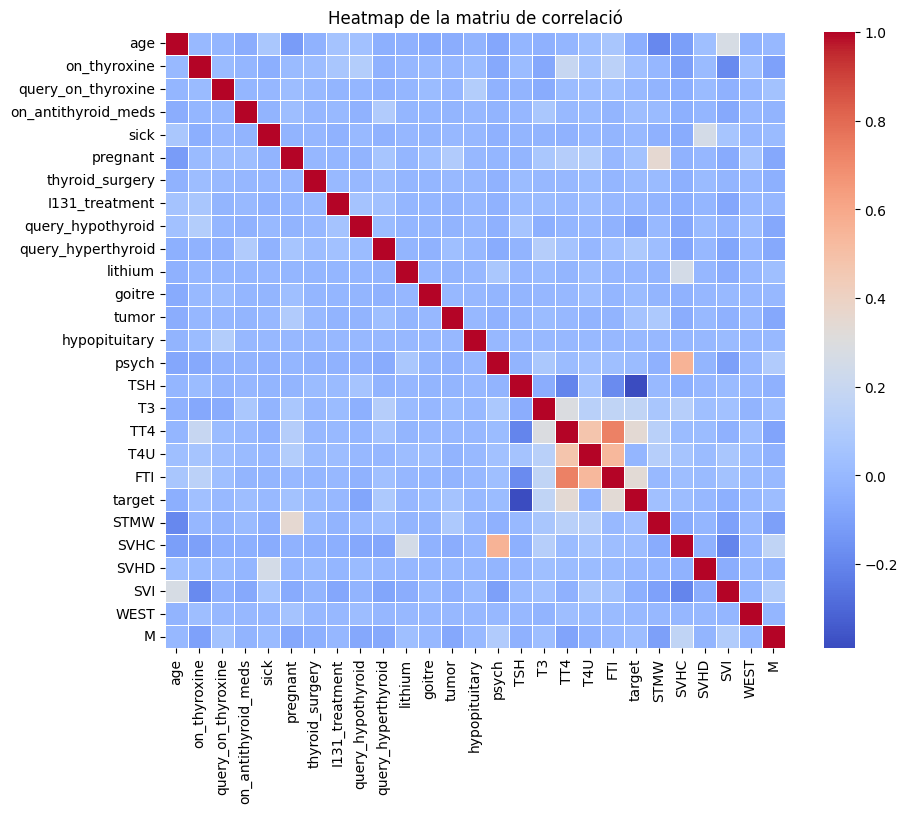

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Calcular la matriu de correlació i mostrar un heatmap sense anotacions
correlation_matrix = df_fill_na.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

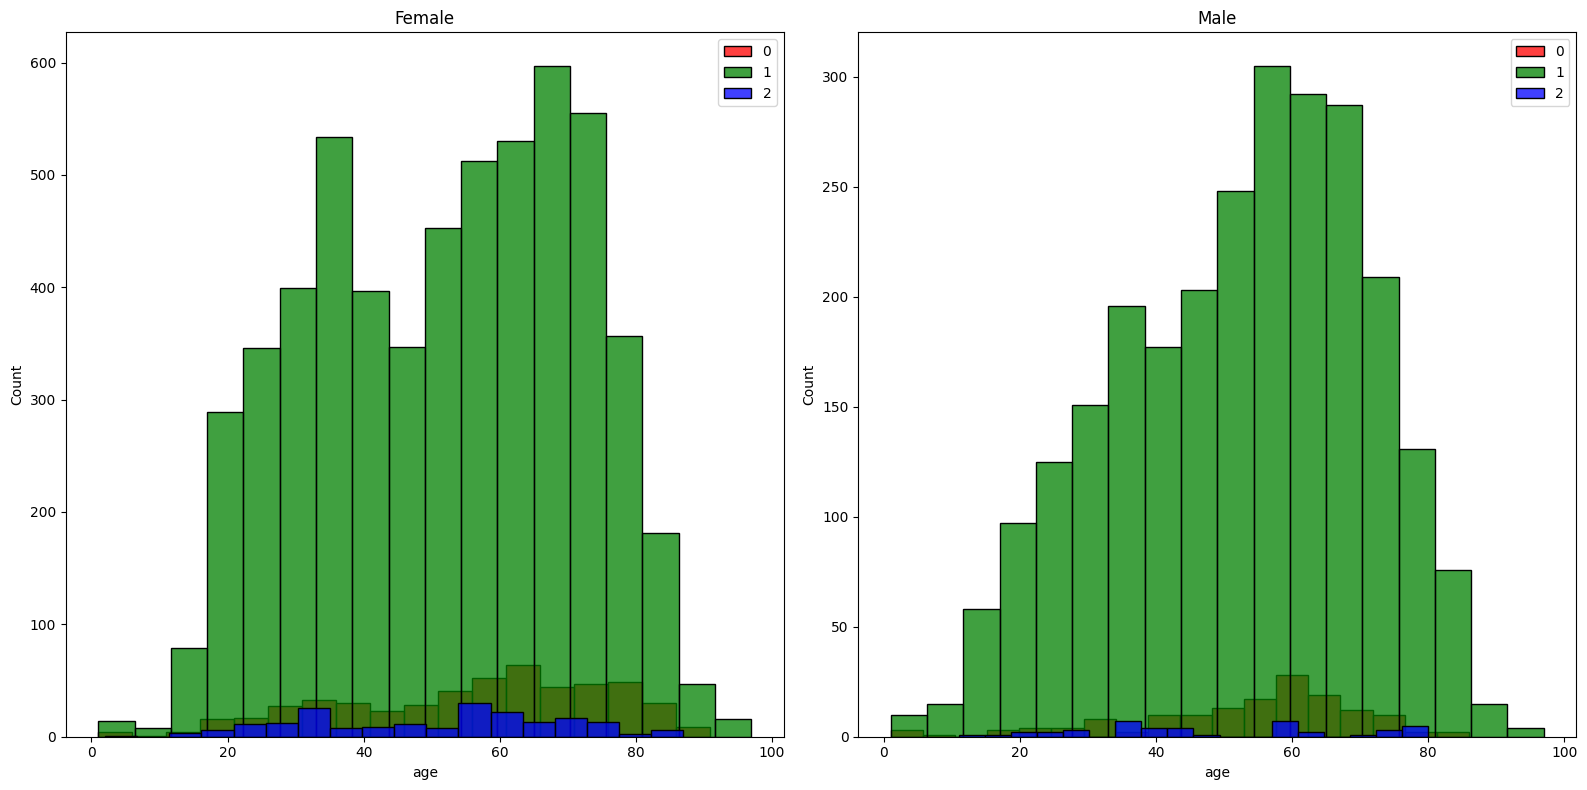

In [23]:
# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Filtrar dades per sexe
women = df_fill_na[df_fill_na['M'] == 0]
men = df_fill_na[df_fill_na['M'] == 1]

# Colors i targets
targets = [0,1,2]
colors = ['red', 'green', 'blue']

# Subplot per a dones
for target, color in zip(targets, colors):
    sns.histplot(
        data=women[women['target'] == target],
        x="age",
        bins=18,
        label=target,
        ax=axes[0],
        color=color,
        kde=False
    )
axes[0].legend()
axes[0].set_title('Female')

# Subplot per a homes
for target, color in zip(targets, colors):
    sns.histplot(
        data=men[men['target'] == target],
        x="age",
        bins=18,
        label=target,
        ax=axes[1],
        color=color,
        kde=False
    )
axes[1].legend()
axes[1].set_title('Male')

# Mostrar la gràfica
plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
target_att = 'target'
attributes = [k for k in df.keys() if k!= target_att]
X = df_fill_na[attributes]
y = df_fill_na[[target_att]]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


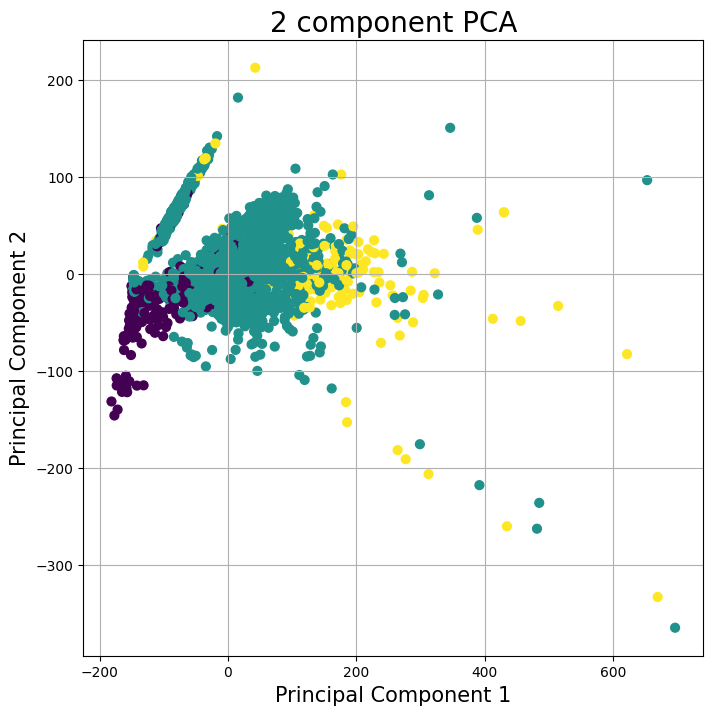

In [25]:
from sklearn.decomposition import PCA

# Provem PCA amb 2 components
pca = PCA(n_components=2)
y_pca = np.array(y)
X_data_pca_2 = pca.fit_transform(X)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_data_pca_2[:,0], X_data_pca_2[:,1],c = y_pca[:], s = 40, cmap='viridis')
ax.grid()

In [26]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
ovo_model = OneVsOneClassifier(XGBClassifier())
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

print(f1_score(y_val,y_pred,average='macro'))
print(accuracy_score(y_val,y_pred))
print("Matriu de confusió:\n", cm)




0.930017864978374
0.987886129618413
Matriu de confusió:
 [[ 103    2    0]
 [   4 1495    6]
 [   0    8   33]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score

# Configuració de classificadors
random_state = 20
base_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'SVC': SVC(kernel='linear', random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=random_state)
}

PRC = 0.1
acc_r=np.zeros((10,7,2))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=PRC,random_state=random_state*(i+1))
    for j, model in enumerate(base_classifiers.values()):
        ovo = OneVsOneClassifier(model)
        ovr = OneVsRestClassifier(model)
        ovo.fit(X_train,y_train)
        ovr.fit(X_train,y_train)
        yhat_ovo=ovo.predict(X_test)
        yhat_ovr=ovr.predict(X_test)
        acc_r[i][j][0] = f1_score(y_test, yhat_ovo,average='macro')
        acc_r[i][j][1] = f1_score(y_test, yhat_ovr, average='macro')
        print(acc_r[i][j][0],acc_r[i][j][1])




0.7475493558033836 0.7393610113565589
0.8806216134858519 0.8806216134858519
0.9550219254896929 0.9273382780600391
0.968889332459011 0.9572448722345142
0.7445546785787945 0.6627512694184161
0.6855912760232261 0.6855912760232261
0.9416706750040084 0.9604675317565041
0.6915173504795601 0.6936289643558798
0.8941717525981976 0.8815437809430454
0.9154590786949276 0.9154590786949276
0.9281441536524898 0.908137169427492
0.7164854393200849 0.6082763692696058
0.7144936471669144 0.7144936471669144
0.9071136339948281 0.9223770804830392
0.735381163478967 0.7104172388054447
0.9133204192974927 0.8961978148361127
0.8806139940782297 0.8806139940782297
0.865387296313315 0.8948467052660601
0.7352486658263832 0.6983120825743777
0.6904050093248496 0.6904050093248496
0.9122622780177209 0.9012442936035842
0.6416131435739278 0.5736674492517528
0.8751259935335455 0.8715966499692751
0.8384863141010964 0.8547973989834455
0.8569847484518144 0.8670943151058917
0.651043861529533 0.6138035120838495
0.712082574377656

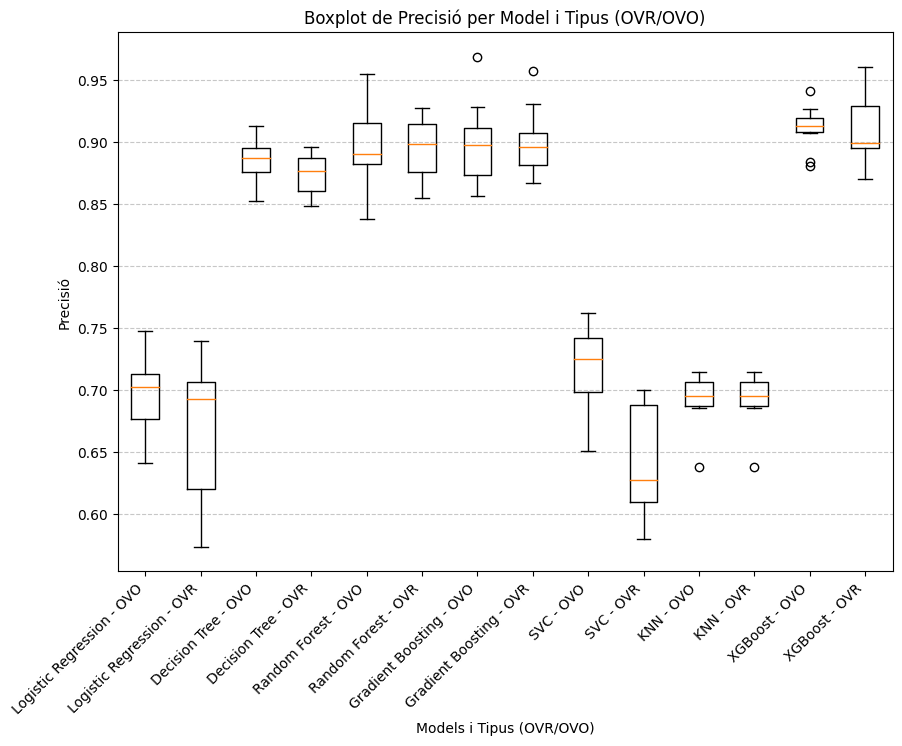

In [105]:
boxplot_data = []
for j in range(acc_r.shape[1]):  # Recórrer els models
    for k in range(acc_r.shape[2]):  # Recórrer els tipus (OVR/OVO)
        # Reorganitzar les dades per cada combinació (model, tipus)
        data = acc_r[:, j, k].reshape(-1)  # Combina totes les iteracions i observacions
        boxplot_data.append(data)

# Crear el boxplot
plt.figure(figsize=(10, 7))
labels = [
    f'{model} - {"OVR" if k == 1 else "OVO"}'
    for j, model in enumerate(base_classifiers.keys())
    for k in range(2)  # OVR (1) i OVO (0)
]
plt.boxplot(boxplot_data, labels=labels)
plt.title('Boxplot de Precisió per Model i Tipus (OVR/OVO)')
plt.xlabel('Models i Tipus (OVR/OVO)')
plt.ylabel('Precisió')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

In [107]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'KNN','XGBoost']

# Llista per guardar les dades que volem guardar
data_for_saving = []

# Iterar sobre els models (j) i tipus (k) (OVR/OVO)
for j in range(acc_r.shape[1]):  # Recórrer els models
    for k in range(acc_r.shape[2]):  # Recórrer els tipus (OVR/OVO)
        # Iterar sobre les mostres (iteracions)
        for i in range(acc_r.shape[0]):  # Recórrer les mostres
            # Obtenir la precisió per cada mostra (iteració)
            precisio = acc_r[i, j, k]
            
            # Afegir les dades a la llista amb el model, tipus, iteració (muestra) i precisió
            data_for_saving.append({
                'Model': models[j],
                'Tipus': 'OVR' if k == 1 else 'OVO',
                'Mostra': i + 1,  # Les mostres comencen de 1 (en comptes de 0)
                'Precisio': precisio
            })

# Crear el DataFrame amb les dades
df_results = pd.DataFrame(data_for_saving)

# Mostrar els primers resultats
print(df_results.head())

# Guardar el DataFrame com a fitxer CSV
df_results.to_csv('resultats_per_model_default_df_fillna.csv', index=False)

                 Model Tipus  Mostra  Precisio
0  Logistic Regression   OVO       1  0.747549
1  Logistic Regression   OVO       2  0.691517
2  Logistic Regression   OVO       3  0.735381
3  Logistic Regression   OVO       4  0.641613
4  Logistic Regression   OVO       5  0.703706


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score

random_state = 20

# Paràmetres pel Logistic Regressor
lr_param_grid = {
    'random_state' : [random_state],  
    'penalty' : ['l2', 'l1'], 
    'solver' : ['lbfgs', 'liblinear'],  
    'C' : [0.01, 0.1, 1.0, 10.0, 100.0],
}


# Paràmetres pel DTC
dtc_param_grid = {'random_state' : [random_state],
                  'criterion' : ['gini'],
                  'max_depth' : [None, 3, 5, 7, 10],
                  'min_samples_leaf' : [1, 5, 10], 
                  'min_samples_split' : [2, 5, 10],
                  'max_features': [None, 1, 2, 3, 4]}

# Paràmetres pel RFC
rfc_param_grid = {'random_state': [random_state],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [None, 2, 3, 4],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'class_weight': [None, 'balanced'],
}

# Paràmetres pel GBC
gbc_param_grid = {
    'random_state': [random_state], 
    'loss': ['exponential'],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Paràmetres pel KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

xgb_param_grid = {
    'random_state': [random_state],
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 10], 
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.6, 0.8, 1.0]  
}

param_grid_list = {
    'Logistic Regression': lr_param_grid, 
    'Decision Tree': dtc_param_grid, 
    'Random Forest': rfc_param_grid, 
    'Gradient Boosting': gbc_param_grid,
    'KNN': knn_param_grid,
    'XGBoost': xgb_param_grid}

base_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=random_state)
}

In [32]:
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

# Assuming `base_classifiers` is a dictionary of classifiers and `param_grid_list` contains hyperparameter grids
# Define a random_state for reproducibility
random_state = 42

# Stratified K-Fold cross-validation setup
kfold = StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)

# Loop through each model in the base_classifiers dictionary
for name, model in base_classifiers.items():
    # Initialize the results list to store the output
    results = []

    # Start timing the execution
    start_time = time.time()

    # Modify param_grid to include the base estimator's parameters with the prefix 'estimator__'
    param_grid_ovr = {f'estimator__{key}': value for key, value in param_grid_list[name].items()}

    # OVR (One-vs-Rest) Strategy
    ovr_model = OneVsRestClassifier(model)
    gs_ovr = GridSearchCV(estimator=ovr_model, param_grid=param_grid_ovr, cv=kfold, 
                          scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
    gs_ovr.fit(X, y)
    cv_results_ovr = gs_ovr.cv_results_
    best_index_ovr = gs_ovr.best_index_
    mean_f1_best_model_ovr = gs_ovr.best_score_
    best_params_ovr = gs_ovr.best_params_

    # OVO (One-vs-One) Strategy
    ovo_model = OneVsOneClassifier(model)
    gs_ovo = GridSearchCV(estimator=ovo_model, param_grid=param_grid_ovr, cv=kfold, 
                          scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
    gs_ovo.fit(X, y)
    cv_results_ovo = gs_ovo.cv_results_
    best_index_ovo = gs_ovo.best_index_
    mean_f1_best_model_ovo = gs_ovo.best_score_
    best_params_ovo = gs_ovo.best_params_

    # End timing the execution
    end_time = time.time()
    calc_time = end_time - start_time

    # Store the results for both OVR and OVO strategies
    results.append({
        'Classifier': name,
        'Strategy': 'OVR',  # One-vs-Rest
        'Mean Test Score (F1)': mean_f1_best_model_ovr,
        'Execution Time (s)': calc_time,  
        'Best Parameters': best_params_ovr,
        'Best Estimator': gs_ovr.best_estimator_  
    })
    results.append({
        'Classifier': name,
        'Strategy': 'OVO',  # One-vs-One
        'Mean Test Score (F1)': mean_f1_best_model_ovo,
        'Execution Time (s)': calc_time,  
        'Best Parameters': best_params_ovo,
        'Best Estimator': gs_ovo.best_estimator_  
    })

    # Print the results for each strategy
    print(f'Classifier: {type(model).__name__}, OVR Mean Test Score: {mean_f1_best_model_ovr:.4f}, OVO Mean Test Score: {mean_f1_best_model_ovo:.4f}, Time: {calc_time:.2f}s')

    # Convert results to DataFrame and save as CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(f'{name}_hyperparameters_search_results_df_fillna.csv', index=False)


Classifier: KNeighborsClassifier, OVR Mean Test Score: 0.7018, OVO Mean Test Score: 0.7027, Time: 653.48s
Classifier: LogisticRegression, OVR Mean Test Score: 0.7024, OVO Mean Test Score: 0.7348, Time: 6.91s
Classifier: DecisionTreeClassifier, OVR Mean Test Score: 0.9098, OVO Mean Test Score: 0.9131, Time: 20.35s


KeyboardInterrupt: 